In [1]:
import pandas as pd 
import numpy as np 

In [2]:
Data = 'https://raw.githubusercontent.com/Jatin-Mehra119/Titanic_Dataset/main/train.csv'
df_Org = pd.read_csv(Data)

In [3]:
df_Org.shape

(891, 12)

In [4]:
df = df_Org .copy()

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
for x in df.columns[:-1]:
    print(f'Number of Null Values in {x} Column : {df[x].isnull().sum()}')

Number of Null Values in PassengerId Column : 0
Number of Null Values in Survived Column : 0
Number of Null Values in Pclass Column : 0
Number of Null Values in Name Column : 0
Number of Null Values in Sex Column : 0
Number of Null Values in Age Column : 177
Number of Null Values in SibSp Column : 0
Number of Null Values in Parch Column : 0
Number of Null Values in Ticket Column : 0
Number of Null Values in Fare Column : 0
Number of Null Values in Cabin Column : 687


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization

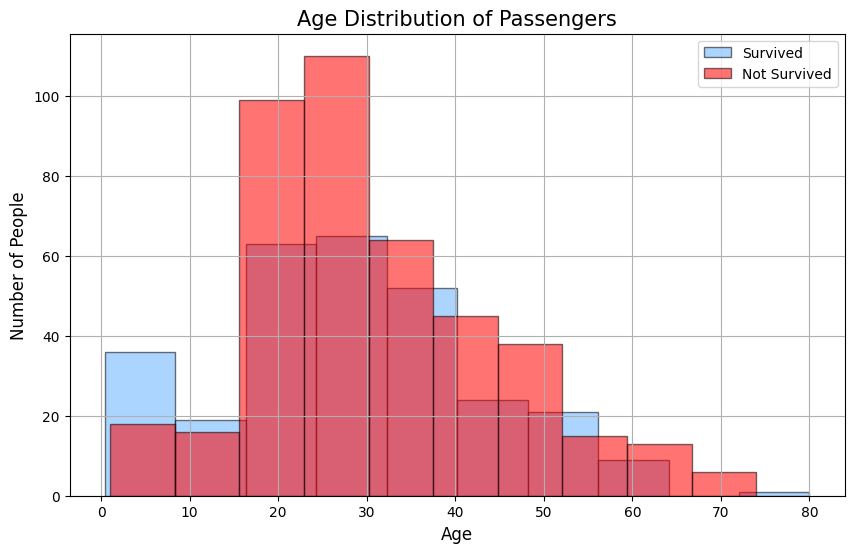

In [9]:
import matplotlib.pyplot as plt
df[df['Survived'] == 1]['Age'].plot(
    kind='hist', bins=10, edgecolor='black', figsize=(10, 6), 
    grid=True, color='#66b3ff', label='Survived', alpha=0.55
)

# Plotting the histogram for passengers who did not survive
df[df['Survived'] == 0]['Age'].plot(
    kind='hist', bins=10, edgecolor='black', figsize=(10, 6), 
    grid=True, color='red', label='Not Survived', alpha=0.55
)

# Adding titles and labels
plt.title('Age Distribution of Passengers', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

In [10]:
df['Cabin_CAT'] = df['Cabin'].str[0]
df['Cabin_CAT'].value_counts()

Cabin_CAT
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [11]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

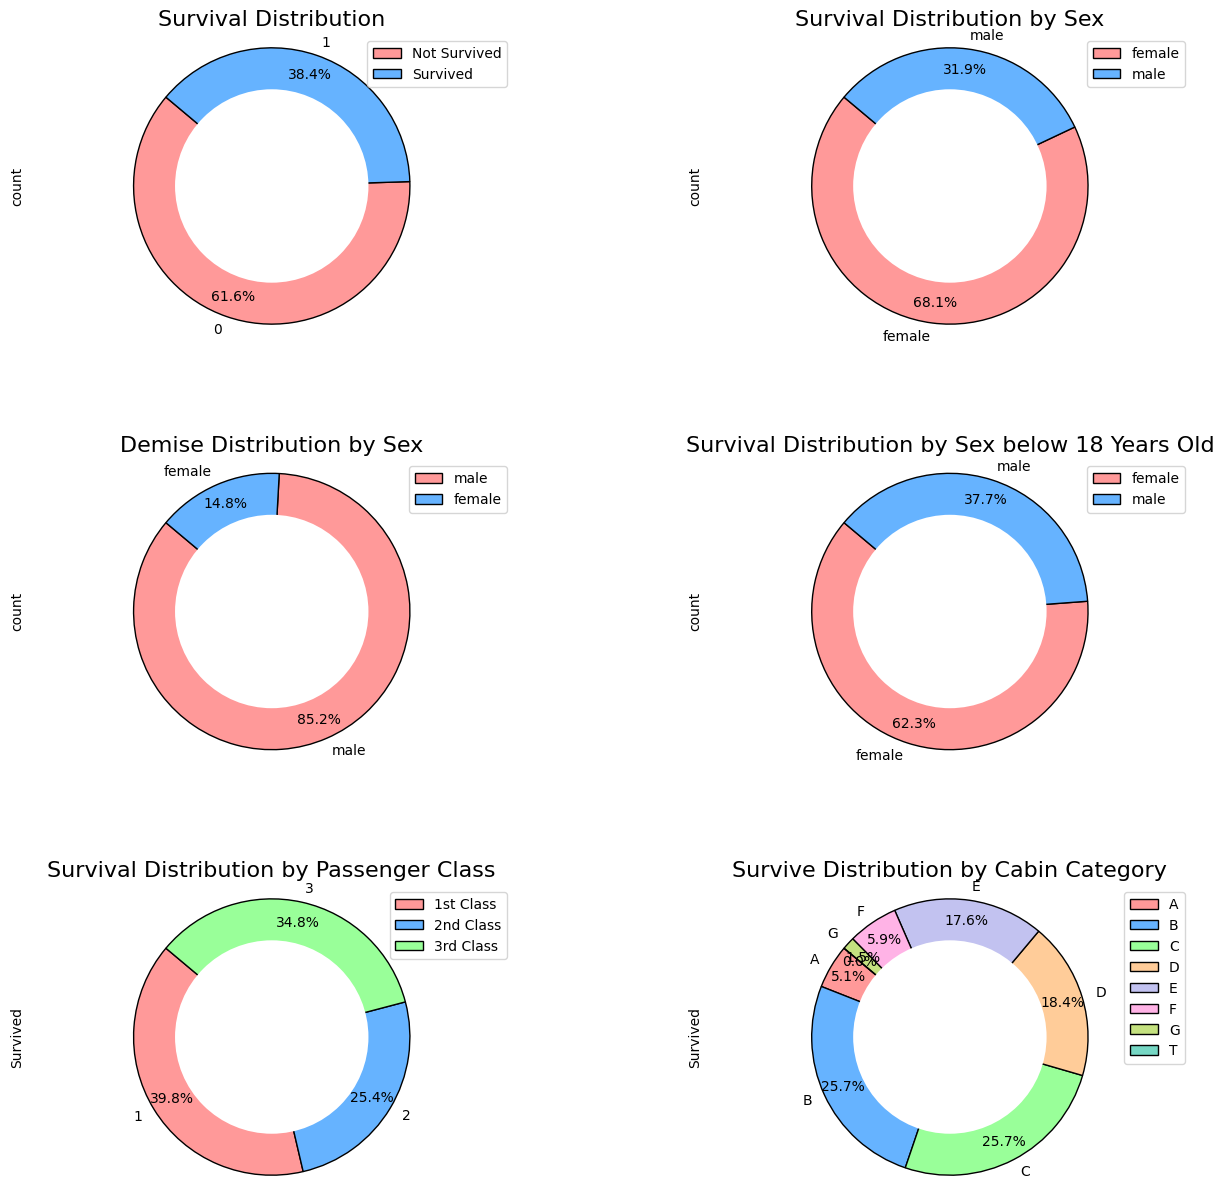

Not Survived: 549
Survived: 342


In [12]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#76d7c4']

# Plot 1: Survival Distribution
data = df['Survived'].value_counts()
data.plot(kind='pie',
          autopct='%1.1f%%',
          startangle=140,
          colors=colors[:2],
          ax=axs[0, 0],
          pctdistance=0.85,
          wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axs[0, 0].add_artist(centre_circle)
axs[0, 0].set_title('Survival Distribution', fontsize=16)
axs[0, 0].legend(['Not Survived', 'Survived'], loc="best")
axs[0, 0].axis('equal')

# Plot 2: Survival Distribution by Sex
data = df[df['Survived'] == 1]['Sex'].value_counts()
data.plot(kind='pie',
          autopct='%1.1f%%',
          startangle=140,
          colors=colors[:2],
          ax=axs[0, 1],
          pctdistance=0.85,
          wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axs[0, 1].add_artist(centre_circle)
axs[0, 1].set_title('Survival Distribution by Sex', fontsize=16)
axs[0, 1].legend(data.index, loc="best")
axs[0, 1].axis('equal')

# Plot 3: Demise Distribution by Sex
data = df[df['Survived'] == 0]['Sex'].value_counts()
data.plot(kind='pie',
          autopct='%1.1f%%',
          startangle=140,
          colors=colors[:2],
          ax=axs[1, 0],
          pctdistance=0.85,
          wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axs[1, 0].add_artist(centre_circle)
axs[1, 0].set_title('Demise Distribution by Sex', fontsize=16)
axs[1, 0].legend(data.index, loc="best")
axs[1, 0].axis('equal')

# Plot 4: Survival Distribution by Sex below 18 Years Old
data = df[(df['Survived'] == 1) & (df['Age'] < 18)]['Sex'].value_counts()
data.plot(kind='pie',
          autopct='%1.1f%%',
          startangle=140,
          colors=colors[:2],
          ax=axs[1, 1],
          pctdistance=0.85,
          wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axs[1, 1].add_artist(centre_circle)
axs[1, 1].set_title('Survival Distribution by Sex below 18 Years Old', fontsize=16)
axs[1, 1].legend(data.index, loc="best")
axs[1, 1].axis('equal')

# Plot 5: Survival Distribution by Passenger Class
data = df.groupby('Pclass')['Survived'].sum()
data.plot(kind='pie',
          autopct='%1.1f%%',
          startangle=140,
          colors=colors,
          ax=axs[2, 0],
          pctdistance=0.85,
          wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axs[2, 0].add_artist(centre_circle)
axs[2, 0].set_title('Survival Distribution by Passenger Class', fontsize=16)
axs[2, 0].legend(['1st Class', '2nd Class', '3rd Class'], loc="best")
axs[2, 0].axis('equal')

# Plot 6: Survive Distribution by Cabin Category
data = df.groupby('Cabin_CAT')['Survived'].sum()
data.plot(kind='pie',
          autopct='%1.1f%%',
          startangle=140,
          colors=colors,  
          ax=axs[2, 1],
          pctdistance=0.85,
          wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axs[2, 1].add_artist(centre_circle)
axs[2, 1].set_title('Survive Distribution by Cabin Category', fontsize=16)
axs[2, 1].legend(data.index, loc="best")
axs[2, 1].axis('equal')

plt.show()

# Print counts
print(f'Not Survived: {df["Survived"].value_counts()[0]}')
print(f'Survived: {df["Survived"].value_counts()[1]}')


In [13]:
unique_tickets = df['Ticket'].nunique()
print(f"Number of unique tickets: {unique_tickets}")

# Check for duplicate tickets
duplicate_tickets = df['Ticket'].value_counts()
print(duplicate_tickets.head())

Number of unique tickets: 681
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_6888\3207524414.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop('PassengerId', axis=1).hist(bins=40, grid=True, edgecolor='black', alpha=0.7, color='skyblue', ax=ax)


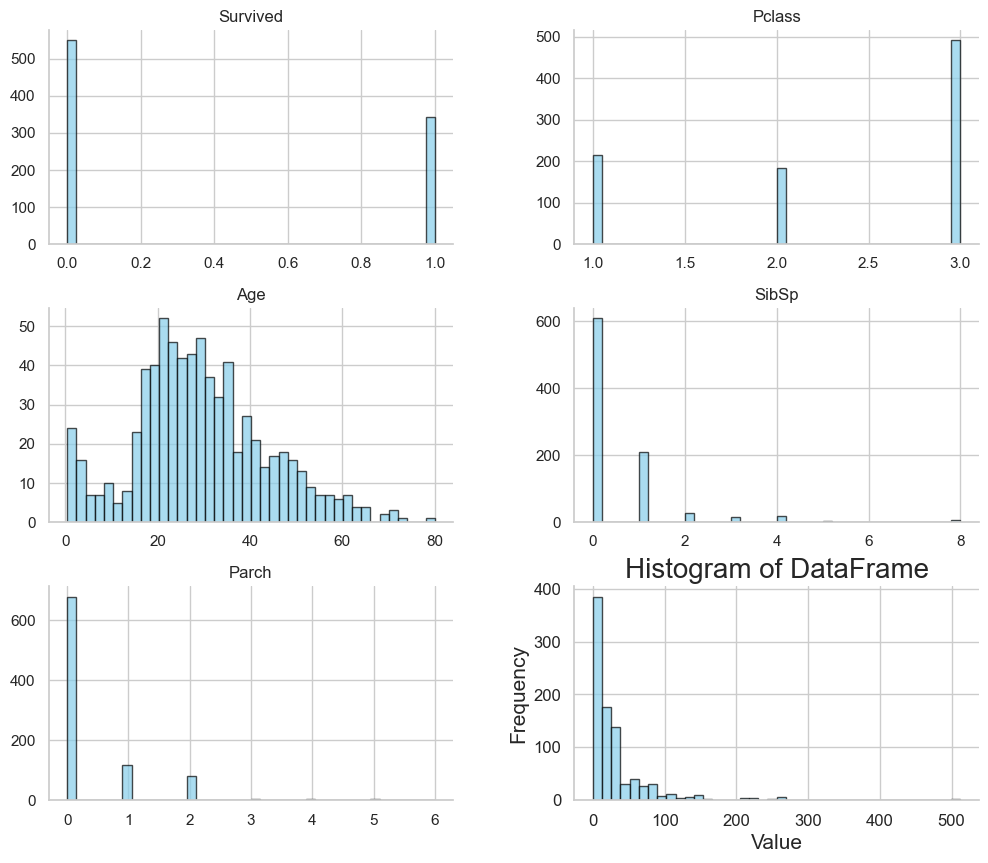

In [14]:
import seaborn as sns

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 10))

df.drop('PassengerId', axis=1).hist(bins=40, grid=True, edgecolor='black', alpha=0.7, color='skyblue', ax=ax)
plt.title('Histogram of DataFrame', fontsize=20)
plt.xlabel('Value', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# Preprocessing

<Axes: >

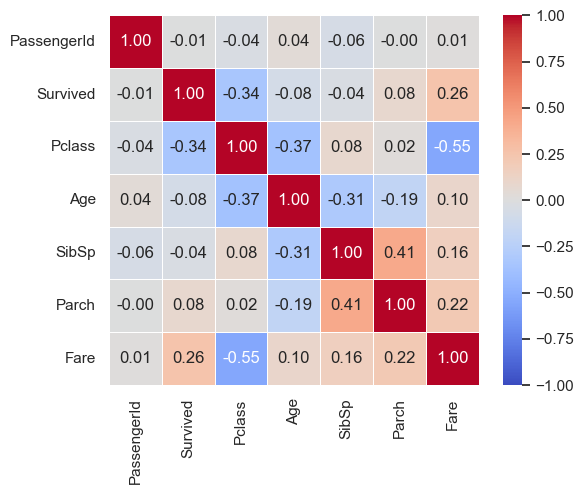

In [15]:
Corr_Matrix = df.corr(numeric_only=True)
sns.heatmap(Corr_Matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector



from sklearn.base import BaseEstimator, TransformerMixin



class ExtractTicketPrefix(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        # Extract the ticket prefix
        df['Ticket_Prefix'] = df['Ticket'].str.extract(r'([A-Za-z]+)', expand=False)
        # Replace '.' and '/' with empty string
        df['Ticket_Prefix'] = df['Ticket_Prefix'].str.replace('[./]', '', regex=True)
        # Fill NaN values with 'None'
        df['Ticket_Prefix'] = df['Ticket_Prefix'].fillna('None')
        return df[['Ticket_Prefix']]


TICKET_pipeline = Pipeline([
    ('ticket_prefix_extractor', ExtractTicketPrefix()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

CABIN_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, make_column_selector(dtype_include=np.number)),
    ('Cabin_fillna', CABIN_pipeline, ['Cabin']),
    ('Ticket_Prefix_features', TICKET_pipeline, ['Ticket']),
    ('categorical', categorical_pipeline, ['Sex','Embarked'])
])


class DenseTransformer(BaseEstimator, TransformerMixin): # GaussianNB does not support Sparse matrix
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.toarray()
    
from sklearn.decomposition import PCA
preprocessor_final = Pipeline([('Preprocessor_', preprocessor),
                               ('DenseTransformer', DenseTransformer()),
                               ('pca', PCA())
                              ])

In [17]:
DF = make_pipeline(preprocessor_final).fit_transform(df)

In [18]:
pd.DataFrame(DF)

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,-1.468200,0.446166,-0.196519,1.749997,0.571502,0.158386,-0.034970,0.340174,-0.310060,0.641902,...,0.002095,-0.003811,0.000738,-0.005008,-0.000162,-2.912575e-16,-2.979947e-16,1.757740e-17,-1.966294e-16,-4.494488e-17
1,2.490083,-0.292018,-0.921115,1.754981,0.087745,0.752123,0.188876,-0.860050,0.005805,0.821961,...,-0.003040,-0.011590,0.069363,0.003873,-0.051864,9.586112e-17,-4.103180e-18,8.563182e-18,-7.634889e-18,8.680993e-19
2,-0.280888,0.136303,-2.126528,1.198484,-0.550662,0.185088,0.452713,0.668062,-0.078186,0.781152,...,0.006876,0.010878,-0.003728,-0.002163,0.001324,1.034995e-15,1.503413e-16,8.298254e-18,2.982412e-16,-9.227719e-18
3,1.975349,-0.173755,-1.063633,1.596598,-0.222059,0.889466,-0.718052,0.250374,0.548974,-0.219272,...,0.006248,0.002701,-0.010761,0.004263,0.007951,6.449825e-16,-7.034560e-17,6.894178e-17,3.182112e-17,3.033759e-17
4,-1.335355,-0.575127,-0.112788,1.757006,-0.175875,-0.259768,0.159615,0.335466,-0.035752,-0.330363,...,-0.008044,0.008355,0.004959,-0.001941,0.002068,-1.364581e-15,2.569796e-16,1.121941e-16,8.103319e-17,4.607442e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.624805,-0.857760,0.783121,-1.524014,0.505474,-0.083282,-0.594197,0.060302,0.215322,-0.075912,...,0.003366,-0.007776,0.015672,-0.007319,-0.008675,9.433072e-17,1.824315e-17,-1.671088e-17,7.834285e-18,1.829079e-18
887,1.509315,-0.486996,-0.981882,-2.021449,0.381235,0.353459,-1.142425,0.077458,0.706630,0.076119,...,-0.068061,-0.007518,-0.076792,0.021970,0.005414,9.586112e-17,-4.103180e-18,8.563182e-18,-7.634889e-18,8.680993e-19
888,-0.434277,1.570919,1.221215,-1.643817,-1.119865,-0.772611,0.291716,0.126223,0.550213,1.028881,...,-0.013148,0.004639,0.001031,0.004434,0.004698,1.001764e-15,-1.275001e-16,1.331320e-17,-2.000959e-17,5.658917e-18
889,1.482023,-0.996515,-0.438126,-1.823536,0.577632,0.273944,-0.805798,-1.115411,-0.670959,-0.312186,...,-0.092057,0.095183,0.052350,0.030046,0.012609,9.586112e-17,-4.103180e-18,8.563182e-18,-7.634889e-18,8.680993e-19


## Preparing Train, Test sets

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.8, stratify=df[['Survived']], random_state=42)

train_X, train_y = train.drop('Survived', axis=1).copy(), train['Survived'].copy()
test_X, test_y = test.drop('Survived', axis=1).copy(), test['Survived'].copy()

# Training

In [20]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = Pipeline([
                    ('Preprocessor', preprocessor_final),
                    ('randomforestclassifier', RandomForestClassifier())
                   ])
rnd_clf.fit(train_X, train_y)

Pipeline(steps=[('Preprocessor',
                 Pipeline(steps=[('Preprocessor_',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000024F69942960>),
                                                                  ('Cabin_fillna',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(fill_v...
                                                                                    ExtractTicketPrefix()),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Ticket']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Sex',
                                                                    'Embarked'])])),
                                 ('DenseTransformer', DenseTransformer()),
                                 ('pca', PCA())])),
                ('randomforestclassifier', RandomForestClassifier())])

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(rnd_clf, train_X, train_y, cv=3, scoring='accuracy')

array([0.78991597, 0.8185654 , 0.82700422])

In [22]:
from sklearn.metrics import  classification_report
y_pred = rnd_clf.predict(train_X)
print(classification_report(train_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       1.00      1.00      1.00       273

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [33]:
rnd_clf.score(test_X, test_y)

0.8156424581005587

## Hyperparameter tuning

In [34]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import uniform
param_distributions = {
    'Preprocessor__pca__n_components': [x for x in range(5, 10)],
    'randomforestclassifier__max_features': ['sqrt', 'log2', None],
    'randomforestclassifier__max_samples': [x for x in range(1, 505)]  
}
Reg_rand_search = RandomizedSearchCV(estimator = rnd_clf, 
                                 param_distributions = param_distributions, n_iter = 20, 
                                 n_jobs = 3, cv = 5, scoring = 'accuracy')

In [35]:
Reg_rand_search.fit(train_X, train_y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('Preprocessor',
                                              Pipeline(steps=[('Preprocessor_',
                                                               ColumnTransformer(transformers=[('numerical',
                                                                                                Pipeline(steps=[('imputer',
                                                                                                                 SimpleImputer(strategy='median')),
                                                                                                                ('scaler',
                                                                                                                 StandardScaler())]),
                                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x0000024F69942960>),
                                                                                               ('Cabin_fillna',
                                                                                                Pipeline(step...
                                                              ('pca', PCA())])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'Preprocessor__pca__n_components': [5,
                                                                            6,
                                                                            7,
                                                                            8,
                                                                            9],
                                        'randomforestclassifier__max_features': ['sqrt',
                                                                                 'log2',
                                                                                 None],
                                        'randomforestclassifier__max_samples': [1,
                                                                                2,
                                                                                3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10,
                                                                                11,
                                                                                12,
                                                                                13,
                                                                                14,
                                                                                15,
                                                                                16,
                                                                                17,
                                                                                18,
                                                                                19,
                                                                                20,
                                                                                21,
                                                                                22,
               

In [36]:
Reg_Final_model = Reg_rand_search.best_estimator_

In [37]:
Reg_Final_model

Pipeline(steps=[('Preprocessor',
                 Pipeline(steps=[('Preprocessor_',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000024F76874D10>),
                                                                  ('Cabin_fillna',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(fill_v...
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Ticket']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Sex',
                                                                    'Embarked'])])),
                                 ('DenseTransformer', DenseTransformer()),
                                 ('pca', PCA(n_components=7))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_samples=155))])

In [38]:
cross_val_score(Reg_Final_model, train_X, train_y, cv=3, scoring='accuracy')

array([0.79831933, 0.82700422, 0.83122363])

In [39]:
Reg_Final_model.score(test_X, test_y)

0.8324022346368715

In [44]:
pd.DataFrame(Reg_rand_search .cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_samples,param_randomforestclassifier__max_features,param_Preprocessor__pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.232456,0.002331,0.021586,0.001020,155,sqrt,7,"{'randomforestclassifier__max_samples': 155, '...",0.790210,0.804196,0.838028,0.838028,0.838028,0.821698,0.020483,1
10,0.255641,0.012049,0.021187,0.000748,227,log2,7,"{'randomforestclassifier__max_samples': 227, '...",0.797203,0.804196,0.809859,0.838028,0.830986,0.816054,0.015749,2
0,0.400151,0.019518,0.026589,0.003206,410,log2,8,"{'randomforestclassifier__max_samples': 410, '...",0.769231,0.811189,0.838028,0.845070,0.809859,0.814675,0.026720,3
2,0.216066,0.003813,0.021587,0.001357,97,log2,7,"{'randomforestclassifier__max_samples': 97, 'r...",0.783217,0.769231,0.838028,0.845070,0.830986,0.813306,0.030922,4
5,0.213667,0.002226,0.022386,0.001019,75,sqrt,7,"{'randomforestclassifier__max_samples': 75, 'r...",0.783217,0.790210,0.852113,0.816901,0.823944,0.813277,0.024782,5
16,0.352580,0.005228,0.022187,0.001166,211,None,8,"{'randomforestclassifier__max_samples': 211, '...",0.790210,0.797203,0.823944,0.830986,0.816901,0.811849,0.015626,6
17,0.227858,0.002965,0.021588,0.000488,138,sqrt,8,"{'randomforestclassifier__max_samples': 138, '...",0.769231,0.797203,0.838028,0.823944,0.816901,0.809061,0.023871,7
3,0.285423,0.002243,0.022186,0.001165,408,sqrt,8,"{'randomforestclassifier__max_samples': 408, '...",0.783217,0.797203,0.816901,0.830986,0.816901,0.809042,0.016806,8
14,0.219264,0.001958,0.021787,0.000748,96,sqrt,6,"{'randomforestclassifier__max_samples': 96, 'r...",0.734266,0.797203,0.823944,0.845070,0.838028,0.807702,0.040207,9
8,0.273630,0.002991,0.022186,0.001165,340,log2,7,"{'randomforestclassifier__max_samples': 340, '...",0.769231,0.804196,0.809859,0.830986,0.823944,0.807643,0.021461,10


## Saving Trained Model

In [40]:
import joblib

joblib.dump(Reg_Final_model, "Titanic_classifier_model.pkl")


['Titanic_classifier_model.pkl']